# <b><span style='color:#F1A424'>AutoML - Regression </span> </b>

## <b> Problem overview:</b>
    

**Dataset used : Fish Weight Dataset**

**Features**:

- `Species`: Species name of fish
- `Length1`: Vertical length in cm
- `Length2`: Diagonal length in cm
- `Length3`: Cross length in cm
- `Height`: Height in cm
- `Width`: Diagonal width in cm

**Target Variable**:

- `Weight`: Weight of fish in gram

        
**Objective**:

The primary objective is typically to build a model that can accurately predict weight of fish in gram.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Train test split with training size 0.7.
- Outlier filteration with 'tukey' method and imputation with median for outlier in 'Length2' feature.
- Feature scaling with 'std' method.
- Replacement of customized value in hyperparameter 'max_depth' for 'xgboost' model.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','fish')

In [5]:
# Fetching in teradata dataframe
fish_df = DataFrame("fish")

In [6]:
# first 5 rows
fish_df.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Bream,450,26.8,29.7,34.7,13.6024,4.9274
Bream,450,27.6,30.0,35.1,14.0049,4.8438
Bream,500,28.5,30.7,36.2,14.2266,4.9594
Bream,475,28.4,31.0,36.2,14.2628,5.1042
Bream,500,29.1,31.5,36.4,13.7592,4.368
Bream,340,29.5,32.0,37.3,13.9129,5.0728
Bream,500,28.7,31.0,36.2,14.3714,4.8146
Bream,500,26.8,29.7,34.5,14.1795,5.2785
Bream,430,26.5,29.0,34.0,12.444,5.134
Bream,340,23.9,26.5,31.1,12.3778,4.6961


In [7]:
# fish_df dataset
fish_df.shape

(159, 7)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
fish_df_sample = fish_df.sample(frac = [0.8, 0.2])

In [9]:
fish_df_sample.head()

Species,Weight,Length1,Length2,Length3,Height,Width,sampleid
Bream,500,28.5,30.7,36.2,14.2266,4.9594,1
Bream,500,29.1,31.5,36.4,13.7592,4.368,1
Bream,340,29.5,32.0,37.3,13.9129,5.0728,1
Bream,600,29.4,32.0,37.2,14.9544,5.1708,1
Bream,700,30.4,33.0,38.5,14.938,5.1975,1
Bream,610,30.9,33.5,38.6,15.633,5.1338,1
Bream,700,30.4,33.0,38.3,14.8604,5.2854,2
Bream,475,28.4,31.0,36.2,14.2628,5.1042,1
Bream,450,27.6,30.0,35.1,14.0049,4.8438,1
Bream,450,26.8,29.7,34.7,13.6024,4.9274,1


In [10]:
# Fetching train and test data
fish_df_train= fish_df_sample[fish_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
fish_df_test = fish_df_sample[fish_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
fish_df_train.shape

(127, 7)

In [12]:
# test data shape
fish_df_test.shape

(32, 7)

In [13]:
#train dataset
fish_df_train.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Bream,475,28.4,31.0,36.2,14.2628,5.1042
Bream,340,29.5,32.0,37.3,13.9129,5.0728
Bream,600,29.4,32.0,37.2,14.9544,5.1708
Bream,700,30.4,33.0,38.5,14.938,5.1975
Bream,650,31.0,33.5,38.7,14.4738,5.7276
Bream,685,31.4,34.0,39.2,15.9936,5.3704
Bream,610,30.9,33.5,38.6,15.633,5.1338
Bream,500,28.7,31.0,36.2,14.3714,4.8146
Bream,500,28.5,30.7,36.2,14.2266,4.9594
Bream,500,26.8,29.7,34.5,14.1795,5.2785


In [14]:
# test dataset
fish_df_test.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Bream,390,27.6,30.0,35.0,12.67,4.69
Bream,700,30.4,33.0,38.3,14.8604,5.2854
Bream,430,26.5,29.0,34.0,12.444,5.134
Bream,575,31.3,34.0,39.5,15.1285,5.5695
Parkki,170,19.0,20.7,23.2,9.396,3.4104
Perch,225,22.0,24.0,25.5,7.293,3.723
Parkki,273,23.0,25.0,28.0,11.088,4.144
Bream,290,24.0,26.3,31.2,12.48,4.3056
Bream,700,31.9,35.0,40.5,16.2405,5.589
Bream,242,23.2,25.4,30.0,11.52,4.02


In [16]:
AutoML.generate_custom_config("custom_fish_weight")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  1



Customizing Feature Engineering Phase ...

Available options for customization of feature engineering phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Missing Value Handling

Index 2: Customize Bincode Encoding

Index 3: Customize String Manipulation

Index 4: Customize Categorical Encoding

Index 5: Customize Mathematical Transformation

Index 6: Customize Nonlinear Transformation

Index 7: Customize Antiselect Features

Index 8: Back to main menu

Index 9: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in feature engineering phase:  8



Customization of feature engineering phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  2



Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Train Test Split

Index 2: Customize Data Imbalance Handling

Index 3: Customize Outlier Handling

Index 4: Customize Feature Scaling

Index 5: Back to main menu

Index 6: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  1,3,4



Customizing Train Test Split ...



Enter the train size for train test split:  0.7



Customization of train test split has been completed successfully.

Customizing Outlier Handling ...

Available outlier detection methods with corresponding indices:
Index 1: percentile
Index 2: tukey
Index 3: carling



Enter the corresponding index oulier handling method:  2

Enter the feature or list of features for outlier handling:  Length2



Available outlier replacement methods with corresponding indices:
Index 1: delete
Index 2: median
Index 3: Any Numeric Value



Enter the index of corresponding replacement method for feature Length2:  2



Customization of outlier handling has been completed successfully.

Available feature scaling methods with corresponding indices:
Index 1: maxabs
Index 2: mean
Index 3: midrange
Index 4: range
Index 5: rescale
Index 6: std
Index 7: sum
Index 8: ustd



Enter the corresponding index feature scaling method:  6



Customization of feature scaling has been completed successfully.

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Train Test Split

Index 2: Customize Data Imbalance Handling

Index 3: Customize Outlier Handling

Index 4: Customize Feature Scaling

Index 5: Back to main menu

Index 6: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  5



Customization of data preparation phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  3



Customizing Model Training Phase ...

Available options for customization of model training phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Model Hyperparameter

Index 2: Back to main menu

Index 3: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in model training phase:  1



Customizing Model Hyperparameter ...

Available models for hyperparameter tuning with corresponding indices:
Index 1: decision_forest
Index 2: xgboost
Index 3: knn
Index 4: glm
Index 5: svm

Available hyperparamters update methods with corresponding indices:
Index 1: ADD
Index 2: REPLACE



Enter the list of model indices for performing hyperparameter tuning:  2



Available hyperparameters for model 'xgboost' with corresponding indices:
Index 1: min_impurity
Index 2: max_depth
Index 3: min_node_size
Index 4: shrinkage_factor
Index 5: iter_num



Enter the list of hyperparameter indices for model 'xgboost':  2

Enter the index of corresponding update method for hyperparameters 'max_depth' for model 'xgboost':  2

Enter the list of value for hyperparameter 'max_depth' for model 'xgboost':  4,5,8,10



Customization of model hyperparameter has been completed successfully.

Available options for customization of model training phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Model Hyperparameter

Index 2: Back to main menu

Index 3: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in model training phase:  3



Customization of model training phase has been completed successfully.

Process of generating custom config file for AutoML has been completed successfully.

'custom_fish_weight.json' file is generated successfully under the current working directory.


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoML instance
# Excluded 'glm' from model training.
# Keeping early stopping timer threshold to 300 sec
# and verbose level 2 for detailed loggging
# Using custom config json for custom run

aml = AutoML(task_type="Regression", 
             exclude=['glm'],
             max_runtime_secs=300,
             verbose=2,
             custom_config_file='custom_fish_weight.json')


 Received below input for customization : 
{
    "TrainTestSplitIndicator": true,
    "TrainingSize": 0.7,
    "OutlierFilterIndicator": true,
    "OutlierFilterMethod": "tukey",
    "OutlierFilterParam": {
        "Length2": {
            "replacement_value": "median"
        }
    },
    "FeatureScalingIndicator": true,
    "FeatureScalingMethod": "std",
    "HyperparameterTuningIndicator": true,
    "HyperparameterTuningParam": {
        "xgboost": {
            "max_depth": {
                "Method": "REPLACE",
                "Value": [
                    4,
                    5,
                    8,
                    10
                ]
            }
        }
    }
}


Feature Exploration started ...

Data Overview:
Total Rows in the data: 127
Total Columns in the data: 7

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
Width,FLOAT,127,0,None,0,127,0,0.0,100.0
Height,FLOAT,127,0,None,0,127,0,0.0,100.0
Length1,FLOAT,127,0,None,0,127,0,0.0,100.0
Length2,FLOAT,127,0,None,0,127,0,0.0,100.0
Weight,INTEGER,127,0,None,1,126,0,0.0,100.0
Length3,FLOAT,127,0,None,0,127,0,0.0,100.0
Species,VARCHAR(20) CHARACTER SET LATIN,127,0,0,None,None,None,0.0,100.0



Statistics of Data:


func,Weight,Length1,Length2,Length3,Height,Width
min,0,9.3,9.8,10.8,1.739,1.048
std,374.32,10.071,10.809,11.69,4.36,1.715
25%,130,19.55,21.4,23.35,6.192,3.46
50%,300,25.9,28,30.6,8.145,4.368
75%,682.5,33.85,36.45,40.6,12.406,6.036
max,1650,59,63.4,68,18.957,8.142
mean,421.567,26.775,28.978,31.814,9.204,4.521
count,127,127,127,127,127,127



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
Species                   7         

No Futile columns found.

Target Column Distribution:


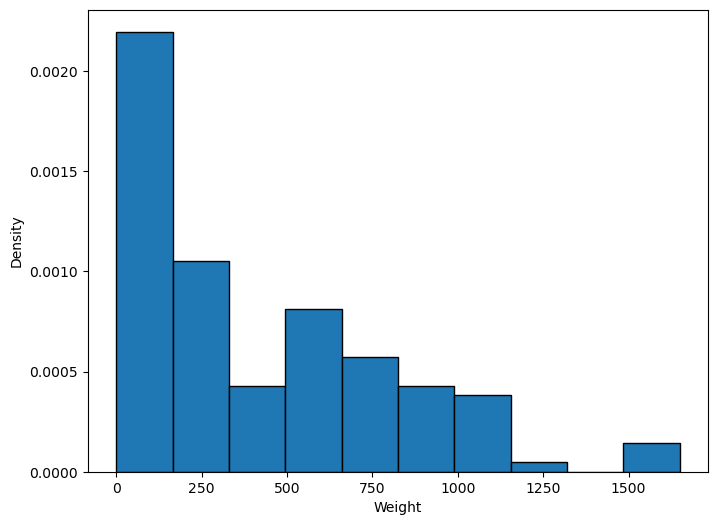

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    Length2           2.362205
1    Length3           0.787402
2    Length1           0.787402
3     Weight           2.362205


Analysis complete. No action taken.                                                     


All categorical columns seem to be significant.                                         


Dataset does not contain any feature related to dates.                                  


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


No Missing Values Detected.                                                              


No imputation is Required.                                                               


No information provided for Variable-Width Transformation.                               
Skipping customized string manipulation.⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 22% - 5/22


AutoML will proceed with default encoding technique.                                     


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__171291122693460"'/22


['Species']


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


Skipping customized anti-select columns.                                                 


Training size : 0.7                                                                       
Testing size  : 0.3                                                                       


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
1,0,0,0,0,0,0,620,31.5,34.5,39.7,15.5227,5.2801,58
1,0,0,0,0,0,0,850,32.8,36.0,41.6,16.8896,6.1984,74
1,0,0,0,0,0,0,500,28.5,30.7,36.2,14.2266,4.9594,82
1,0,0,0,0,0,0,500,28.7,31.0,36.2,14.3714,4.8146,90
1,0,0,0,0,0,0,363,26.3,29.0,33.5,12.73,4.4555,106
1,0,0,0,0,0,0,685,31.4,34.0,39.2,15.9936,5.3704,114
0,1,0,0,0,0,0,120,17.5,19.0,21.3,8.3922,2.9181,8
0,0,0,0,0,1,0,8,10.8,11.3,12.6,1.9782,1.2852,15
0,0,0,1,0,0,0,345,36.0,38.5,41.0,6.396,3.977,21
0,0,0,0,0,1,0,9,11.3,11.8,13.1,2.2139,1.1659,23


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
1,0,0,0,0,0,0,700,30.4,33.0,38.5,14.938,5.1975,42
1,0,0,0,0,0,0,975,37.4,41.0,45.9,18.6354,6.7473,122
1,0,0,0,0,0,0,714,32.7,36.0,41.5,16.517,5.8515,154
1,0,0,0,0,0,0,600,29.4,32.0,37.2,14.9544,5.1708,186
1,0,0,0,0,0,0,725,31.8,35.0,40.9,16.36,6.0532,202
0,0,0,0,1,0,0,145,20.5,22.0,24.3,6.6339,3.5478,12
0,0,0,1,0,0,0,500,42.0,45.0,48.0,6.96,4.896,13
0,1,0,0,0,0,0,90,16.3,17.7,19.8,7.4052,2.673,16
0,0,0,0,1,0,0,150,20.4,22.0,24.7,5.8045,3.7544,20
0,0,0,1,0,0,0,567,43.2,46.0,48.7,7.792,4.87,37


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    Length2           8.661417
1         id           9.448819
2     Weight           7.874016
3    Length3           8.661417
4      Width           9.448819
5    Length1           8.661417
6     Height           9.448819
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__171283872122753"'
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__171283643494990"'2/22
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_o

['Species_3', 'Species_2', 'Species_0', 'Species_5', 'Species_4', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


['Length1', 'Length2', 'Length3', 'Height', 'Width']


Weight,Species_3,Species_2,Species_0,Species_5,id,Species_4,Length1,Length2,Length3,Height,Width
120,0,0,0,0,8,0,-0.8375067087381018,-1.0457116607777026,-0.8200408088446093,-0.1309595519561692,-0.8421577312987043
1100,0,1,0,0,200,0,1.3570036237234753,1.860648422868184,1.205897597785879,0.8238412300232488,1.7079523106635086
510,1,0,0,0,101,0,1.347293401013468,1.8000992544588947,1.205897597785879,-0.49412820120941414,0.031367202824444614
610,0,0,1,0,162,0,0.463663134402833,0.7102142230916874,0.6282540025069382,1.546957469172528,0.41390638482606784
850,0,1,0,0,232,0,1.0462764970032516,1.4973534124124483,0.9380049159173844,0.6885335639315122,1.5321588898889036
9,0,0,0,1,23,0,-1.4395405167585344,-1.9176196858714685,-1.5065158061326263,-1.5626625035139297,-1.835467089187329
0,0,0,0,0,28,1,-0.6918533680879971,-0.8640641555498346,-0.6944661142187526,-0.5751876661843919,-0.5964097535309159
19,0,0,0,1,79,0,-1.19678494900836,-1.530105008052017,-1.2469947705725222,-1.396210205939526,-1.4311025389179783
9,0,0,0,1,87,0,-1.5269325211485971,-0.10719955043371833,-1.598603915524921,-1.5668104864271721,-1.714095365911473
850,0,0,1,0,74,0,0.6481573658929655,1.0129600651381339,0.8794033917586517,1.838150504299907,1.017420334379903


Weight,Species_3,Species_2,Species_0,Species_5,id,Species_4,Length1,Length2,Length3,Height,Width
40,0,0,0,0,68,1,-1.2841769533984229,-1.639093511188738,-1.2469947705725222,-1.114657175794878,-1.2106946640480452
1100,0,1,0,0,312,0,1.2501911739133984,1.7395500860496056,1.130552781010365,0.8905102067908336,1.3972384315065887
650,0,1,0,0,208,0,1.007435606163224,1.3762550755938696,0.8626600991418706,0.5050026998372232,0.9066495042626577
1250,1,0,0,0,53,0,2.5125201262143055,3.434926801509706,2.394671373577323,0.40065428051694735,1.4632814289920493
218,0,1,0,0,368,0,-0.10924000548757849,-0.13747413463836297,-0.2591405061824493,-0.41464450627969046,-0.1472039920933252
9,0,0,0,1,55,0,-1.4298302940485275,-1.8934000185077529,-1.4981441598242358,-1.5648639469595054,-1.845387711127205
320,0,1,0,0,336,0,0.16264623039261694,0.2863700442266622,0.0422387609196069,-0.3109217603597363,0.20857785530474637
955,0,0,1,0,26,0,0.8617822655131193,1.3157059071845805,1.0803229031600223,2.114929878130991,1.0704814894411832
265,0,1,0,0,392,0,-0.07039911464755072,-0.016375797819784366,-0.18379568940693544,-0.4416179817602149,-0.038927489778105964
600,0,0,1,0,186,0,0.31800979375272836,0.5285667178638194,0.5110509541894721,1.3897048878917395,0.4348814140703773


['Length3', 'Width']


['r_Length3', 'r_Width']


id,Weight,r_Length3,r_Width
8,120,-0.8200408088446093,-0.8421577312987043
200,1100,1.205897597785879,1.7079523106635086
101,510,1.205897597785879,0.031367202824444614
162,610,0.6282540025069382,0.41390638482606784
232,850,0.9380049159173844,1.5321588898889036
23,9,-1.5065158061326263,-1.835467089187329
28,0,-0.6944661142187526,-0.5964097535309159
79,19,-1.2469947705725222,-1.4311025389179783
87,9,-1.598603915524921,-1.714095365911473
74,850,0.8794033917586517,1.017420334379903


id,Weight,r_Length3,r_Width
68,40,-1.2469947705725222,-1.2106946640480452
312,1100,1.130552781010365,1.3972384315065887
208,650,0.8626600991418706,0.9066495042626577
53,1250,2.394671373577323,1.4632814289920493
368,218,-0.2591405061824493,-0.1472039920933252
55,9,-1.4981441598242358,-1.845387711127205
336,320,0.0422387609196069,0.20857785530474637
26,955,1.0803229031600223,1.0704814894411832
392,265,-0.18379568940693544,-0.038927489778105964
186,600,0.5110509541894721,0.4348814140703773


['Length1', 'Length2', 'Length3', 'Height', 'Width']


Weight,Species_3,Species_1,Species_2,Species_0,Species_5,id,Species_4,Species_6,Length1,Length2,Length3,Height,Width
500,0,0,0,1,0,82,0,0,0.2306177893626657,0.3711388799996663,0.42733449110556704,1.22105114687176,0.3150403010366737
363,0,0,0,1,0,106,0,0,0.016992889742512278,0.16527170740808272,0.2013000407790247,0.8742426983824759,0.02938307843646949
685,0,0,0,1,0,114,0,0,0.5122142479528679,0.770763391500976,0.6784838803572805,1.6305196277487917,0.5480331934531931
450,0,0,0,1,0,130,0,0,0.14322578497260302,0.28637004422666135,0.335246381713272,1.1696764087786995,0.24950750696526364
920,0,0,0,1,0,146,0,0,0.8617822655131191,1.3157059071845798,1.0886945494684124,2.104015353258717,1.078588054797768
610,0,0,0,1,0,162,0,0,0.46366313440283297,0.7102142230916866,0.6282540025069376,1.5469574691725279,0.4139063848260679
345,1,0,0,0,0,21,0,0,0.9588844926131889,1.3157059071845798,0.8291735139083083,-0.5935407525938213,-0.24187507003385747
200,0,1,0,0,0,24,0,0,-0.4782284684678436,-0.5613183135033891,-0.4433167249670397,0.32174991280974347,-0.4195392366599816
0,0,0,0,0,0,28,1,0,-0.691853368087997,-0.8640641555498357,-0.6944661142187531,-0.5751876661843923,-0.596409753530916
300,1,0,0,0,0,29,0,0,0.5413449160828888,0.770763391500976,0.5612808320398137,-0.7530179504090863,-0.1392674945414242


Weight,Species_3,Species_1,Species_2,Species_0,Species_5,id,Species_4,Species_6,Length1,Length2,Length3,Height,Width
700,0,0,0,1,0,42,0,0,0.4151120208527981,0.6496650546823973,0.619882356198547,1.3859045013120093,0.4500174486872169
975,0,0,0,1,0,122,0,0,1.0948276105532864,1.6184517492310264,1.23938418301944,2.24270629032997,1.328587727682646
714,0,0,0,1,0,154,0,0,0.6384471431829589,1.0129600651381332,0.8710317454502605,1.7518075750555477,0.8207652628974443
600,0,0,0,1,0,186,0,0,0.3180097937527283,0.5285667178638186,0.5110509541894716,1.3897048878917393,0.43488141407037734
725,0,0,0,1,0,202,0,0,0.5510551387928959,0.8918617283195546,0.8208018675999177,1.7154258254813008,0.9351075169130454
145,0,0,0,0,0,12,1,0,-0.5462000274378924,-0.6824166503219677,-0.5688914195928965,-0.5384119740988322,-0.48518540926784764
500,1,0,0,0,0,13,0,0,1.5414978552136074,2.102845096505341,1.4151887554956397,-0.4628445311933427,0.2790993049802084
90,0,1,0,0,0,16,0,0,-0.9540293812581854,-1.203139498641856,-0.9456155034704666,-0.3596779394070075,-0.9811031277251978
150,0,0,0,0,0,20,1,0,-0.5559102501478995,-0.6824166503219677,-0.5354048343593347,-0.7306095734420183,-0.3680653811090816
567,1,0,0,0,0,37,0,0,1.6580205277336915,2.2239434333239196,1.473790279654373,-0.270044431538736,0.264360095240964


['col_0', 'col_1', 'col_2', 'col_3', 'col_4']


                                                                                          
Completed customized hyperparameter update.


response_column : Weight                                                                                                                              
name : knn
model_type : Regression
k : (3, 5, 6, 8, 10, 12)
id_column : id
voting_weight : 1.0
Total number of models for knn : 6
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : Weight
name : decision_forest
tree_type : Regression
min_impurity : (0.0, 0.1, 0.2)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
num_trees : (-1, 20, 30)
Total number of models for decision_forest : 108
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : Weight
name : xgboost
model_type : Regression
column_sampling : (1, 0

KNN_9                                                                                                                                                                                                   
KNN_4                                                                                     
KNN_8                                                                                     


DECISIONFOREST_0                                                                                                                                                                                        
DECISIONFOREST_1                                                                          
DECISIONFOREST_2                                                                          


XGBOOST_3                                                                                                                                                                                               
XGBOOST_1                                                                                 
XGBOOST_2                                                                                 


SVM_3                                                                                                                                                                                                   
SVM_1                                                                                     
SVM_2                                                                                     


,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,knn,rfe,47.849410,5.448357e+03,0.025187,73.812984,0.158703,0.956164,0.953729
1,2,knn,pca,51.387364,7.439020e+03,0.027744,86.249755,0.166564,0.940148,0.931080
2,3,decision_forest,pca,62.669872,7.813414e+03,0.158153,88.393517,0.397684,0.937136,0.927611
3,4,knn,lasso,49.282561,8.130170e+03,0.027453,90.167455,0.165688,0.934587,0.911226
4,5,decision_forest,rfe,87.000000,1.967725e+04,0.133735,140.275613,0.365698,0.841683,0.832888
5,6,decision_forest,lasso,145.006410,3.770418e+04,0.352815,194.175639,0.593982,0.696644,0.588303
6,7,svm,lasso,448.994095,3.226849e+05,8.774630,568.053611,2.962200,-1.596220,-2.523441
7,8,svm,pca,452.229703,3.268275e+05,9.930168,571.688251,3.151217,-1.629549,-2.027966
8,9,svm,rfe,452.591578,3.276263e+05,10.108538,572.386527,3.179393,-1.635977,-1.782420
9,10,xgboost,lasso,1422.663870,2.579083e+06,0.800040,1605.952379,0.894450,-19.750479,-27.161365


In [16]:
# Fitting train data
aml.fit(fish_df_train, fish_df_train.Weight)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,knn,rfe,47.849410,5.448357e+03,0.025187,73.812984,0.158703,0.956164,0.953729
1,2,knn,pca,51.387364,7.439020e+03,0.027744,86.249755,0.166564,0.940148,0.931080
2,3,decision_forest,pca,62.669872,7.813414e+03,0.158153,88.393517,0.397684,0.937136,0.927611
3,4,knn,lasso,49.282561,8.130170e+03,0.027453,90.167455,0.165688,0.934587,0.911226
4,5,decision_forest,rfe,87.000000,1.967725e+04,0.133735,140.275613,0.365698,0.841683,0.832888
5,6,decision_forest,lasso,145.006410,3.770418e+04,0.352815,194.175639,0.593982,0.696644,0.588303
6,7,svm,lasso,448.994095,3.226849e+05,8.774630,568.053611,2.962200,-1.596220,-2.523441
7,8,svm,pca,452.229703,3.268275e+05,9.930168,571.688251,3.151217,-1.629549,-2.027966
8,9,svm,rfe,452.591578,3.276263e+05,10.108538,572.386527,3.179393,-1.635977,-1.782420
9,10,xgboost,lasso,1422.663870,2.579083e+06,0.800040,1605.952379,0.894450,-19.750479,-27.161365


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,knn,rfe,47.84941,5448.356641,0.025187,73.812984,0.158703,0.956164,0.953729


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [19]:
# Generating prediction and metrics on default test data
prediction = aml.predict()

knn rfe

 Prediction : 
    id  prediction  Weight
0   13  541.958205     500
1   50  982.003828     925
2  112   90.049468      80
3   37  542.229534     567
4  154  745.058859     714
5   16   92.031820      90
6  100  506.819101     390
7   12  131.485856     145
8   55    9.021113       9
9   45  314.461292     430

 Performance Metrics : 
        MAE          MSE      MSLE       MAPE       MPE       RMSE     RMSLE          ME        R2        EV       MPD       MGD
0  47.84941  5448.356641  0.025187  10.569013  0.122226  73.812984  0.158703  232.674186  0.956164  0.956172  8.807784  0.027861


In [20]:
# Printing prediction
prediction.head()

id,prediction,Weight
16,92.03182037031716,90
20,150.02651379829365,150
26,932.7550487171717,955
37,542.2295338353506,567
45,314.4612919694693,430
50,982.003828217571,925
42,562.247880624827,700
18,637.7465626556584,650
13,541.958205272727,500
12,131.48585565211513,145


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [21]:
# Generating prediction and metrics on test data
prediction = aml.predict(fish_df_test)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__171284763824159"'

Updated dataset after performing categorical encoding :


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
1,0,0,0,0,0,0,290,24.0,26.3,31.2,12.48,4.3056,50
1,0,0,0,0,0,0,700,31.9,35.0,40.5,16.2405,5.589,34
1,0,0,0,0,0,0,700,30.4,33.0,38.3,14.8604,5.2854,18
1,0,0,0,0,0,0,430,26.5,29.0,34.0,12.444,5.134,10
0,0,1,0,0,0,0,5,7.5,8.4,8.8,2.112,1.408,40
0,0,1,0,0,0,0,120,20.0,22.0,23.5,6.11,3.4075,48
0,0,1,0,0,0,0,197,23.5,25.6,27.0,6.561,4.239,56
0,0,1,0,0,0,0,225,22.0,24.0,25.5,7.293,3.723,72
0,0,1,0,0,0,0,840,32.5,35.0,37.3,11.4884,7.7957,80
0,0,1,0,0,0,0,700,34.5,37.0,39.4,10.835,6.2646,88


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__171283484384608"'

Updated dataset after performing Lasso feature selection:


id,Species_3,Species_2,Species_0,Species_5,Species_4,Length1,Length2,Length3,Height,Width,Weight
58,0,0,1,0,0,23.2,25.4,30.0,11.52,4.02,242
20,0,0,0,0,1,20.5,22.5,25.3,7.0334,3.8203,160
10,0,0,1,0,0,26.5,29.0,34.0,12.444,5.134,430
37,1,0,0,0,0,48.3,51.7,55.1,8.9262,6.1712,950
48,0,1,0,0,0,20.0,22.0,23.5,6.11,3.4075,120
12,0,0,0,0,1,17.5,18.8,21.2,5.5756,2.9044,78
32,0,1,0,0,0,19.0,21.0,22.5,5.6925,3.6675,125
29,1,0,0,0,0,44.8,48.0,51.2,7.68,5.376,770
23,0,0,0,1,0,11.7,12.4,13.5,2.43,1.269,13
45,0,0,0,0,0,25.6,28.0,30.8,8.778,4.6816,306



Updated dataset after performing scaling on Lasso selected features :


Weight,Species_3,Species_2,Species_0,Species_5,id,Species_4,Length1,Length2,Length3,Height,Width
40,0,1,0,0,24,0,-1.19678494900836,-1.530105008052017,-1.2637380631893032,-1.1895525991222444,-1.1177242641543488
78,0,0,0,0,12,1,-0.8375067087381018,-1.0699313281414182,-0.8284124551529999,-0.7836527739359355,-0.8499241610459216
125,0,1,0,0,32,0,-0.6918533680879971,-0.8035149871405454,-0.719581053143924,-0.7565634330109071,-0.41732835519909495
306,0,0,0,0,45,0,-0.050978669227536494,0.04417337058950494,-0.024734409547516746,-0.04155777497690573,0.15755751389966927
13,0,0,0,1,23,0,-1.4006996259185065,-1.8449606837803214,-1.4730292208990643,-1.512585458399314,-1.7770204536444014
160,0,0,0,0,20,1,-0.5462000274378925,-0.6218674819126774,-0.4851749565089914,-0.44583548394015926,-0.33070715334691947
430,0,0,1,0,10,0,0.036413335162526164,0.16527170740808356,0.24315827232097753,0.8079676641262052,0.41401976336252383
950,1,0,0,0,37,0,2.153241885944047,2.9142039531898183,2.0095756433913623,-0.007215257225929089,1.002000853421924
242,0,0,1,0,58,0,-0.2840240142677042,-0.27068230513879965,-0.09170758001464038,0.5938483226828677,-0.21749868469587627
840,0,1,0,0,80,0,0.6190266977629448,0.8918617283195552,0.519422600497862,0.5865256265902169,1.922918015783567



Updated dataset after performing RFE feature selection:


id,Length3,Width,Weight
24,16.0,2.432,40
37,55.1,6.1712,950
58,30.0,4.02,242
80,37.3,7.7957,840
20,25.3,3.8203,160
10,34.0,5.134,430
29,51.2,5.376,770
23,13.5,1.269,13
12,21.2,2.9044,78
32,22.5,3.6675,125



Updated dataset after performing scaling on RFE selected features :


id,Weight,r_Length3,r_Width
45,306,-0.024734409547516746,0.15755751389966927
58,242,-0.09170758001464038,-0.21749868469587627
80,840,0.519422600497862,1.922918015783567
29,770,1.6830814373641347,0.5512077924739536
20,160,-0.4851749565089914,-0.33070715334691947
10,430,0.24315827232097753,0.41401976336252383
40,5,-1.8664965973934153,-1.6982223708076714
8,273,-0.2591405061824493,-0.1472039920933252
12,78,-0.8284124551529999,-0.8499241610459216
32,125,-0.719581053143924,-0.41732835519909495



Updated dataset after performing scaling for PCA feature selection :


Weight,Species_3,Species_1,Species_2,Species_0,Species_5,id,Species_4,Species_6,Length1,Length2,Length3,Height,Width
840,0,0,1,0,0,80,0,0,0.6190266977629447,0.8918617283195546,0.5194226004978615,0.5865256265902167,1.9229180157835672
78,0,0,0,0,0,12,1,0,-0.8375067087381016,-1.0699313281414193,-0.8284124551530004,-0.783652773935936,-0.8499241610459217
125,0,0,1,0,0,32,0,0,-0.691853368087997,-0.8035149871405464,-0.7195810531439246,-0.7565634330109077,-0.417328355199095
5,0,0,1,0,0,40,0,0,-1.8085289797387993,-2.329354031054637,-1.8664965973934158,-1.5862758811038398,-1.6982223708076716
770,1,0,0,0,0,29,0,0,1.8133840910938024,2.4661401069610767,1.6830814373641343,-0.2959982911076253,0.5512077924739536
13,0,0,0,0,1,23,0,0,-1.4006996259185063,-1.8449606837803227,-1.473029220899065,-1.5125854583993146,-1.7770204536444016
40,0,0,1,0,0,24,0,0,-1.1967849490083597,-1.5301050080520182,-1.2637380631893036,-1.189552599122245,-1.117724264154349
120,0,0,1,0,0,48,0,0,-0.5947511409879273,-0.6824166503219677,-0.63586459006002,-0.6598157868500923,-0.5647204525915401
160,0,0,0,0,0,20,1,0,-0.5462000274378924,-0.6218674819126784,-0.48517495650899195,-0.44583548394015976,-0.3307071533469195
430,0,0,0,1,0,10,0,0,0.03641333516252616,0.16527170740808272,0.24315827232097692,0.807967664126205,0.41401976336252383



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,col_3,col_4,Weight
0,40,-4.100594,0.091869,-0.065162,-0.896975,-0.422281,5
1,29,2.816829,1.635800,-0.161071,1.668686,0.052975,770
2,24,-2.774980,0.217814,-0.228074,-0.700072,-0.347941,40
3,37,3.638202,1.657120,-0.279981,1.716511,0.121636,950
4,58,-0.072284,-0.962919,0.417548,0.063388,-0.242517,242
5,45,0.034987,0.005561,-0.007598,0.053154,0.250944,306
6,20,-1.113433,-0.025403,0.240791,-0.147973,0.897783,160
7,12,-1.972026,0.001742,0.378656,-0.161463,0.812430,78
8,8,-0.300078,-0.610840,0.297370,-0.190658,-0.002254,273
9,23,-3.639023,0.139165,0.490024,0.123198,-0.339190,13


Data Transformation completed.
knn rfe

 Prediction : 
   id   prediction  Weight
0  37  1071.104999     950
1  21   491.493519     456
2  45   315.226007     306
3   8   232.740127     273
4  28    85.001995     120
5  31    10.259169      12
6  12   113.887364      78
7  29   651.099718     770
8  10   457.367626     430
9  15     8.672957       7

 Performance Metrics : 
         MAE          MSE      MSLE       MAPE       MPE       RMSE     RMSLE          ME        R2        EV       MPD       MGD
0  34.853513  2674.096143  0.041799  15.559711 -0.889359  51.711664  0.204449  156.181132  0.962092  0.962176  7.116544  0.046934


In [22]:
# Printing prediction
prediction.head()

id,prediction,Weight
12,113.88736363073572,78
15,8.672956984280688,7
16,93.61482532664849,170
18,543.8188679899158,700
21,491.49351875280377,456
23,10.22933808348981,13
20,155.46889594460924,160
13,362.2172164104925,300
10,457.36762559326803,430
8,232.7401273304365,273


In [24]:
remove_context()

True